**MODEL BUILDING**

In [19]:
import pandas as pd

In [20]:
data=pd.read_csv("/content/data.csv", delimiter=';')


In [21]:
data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [22]:
#seperating the data into dependent and independent variables
X=data.drop(columns= 'Target')
y=data['Target']


In [23]:
from sklearn.model_selection import train_test_split



In [24]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
y_train.value_counts() #Imbalance data before SMOTE oversampling

Graduate    1791
Dropout     1105
Enrolled     643
Name: Target, dtype: int64

Graduate    1791
Dropout     1105
Enrolled     643
Name: Target, dtype: int64

In [26]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split



In [27]:
smote = SMOTE(random_state = 42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [28]:
y_train_resampled.value_counts()  #Balance data after SMOTE oversampling

Dropout     1791
Enrolled    1791
Graduate    1791
Name: Target, dtype: int64

Dropout     1791
Enrolled    1791
Graduate    1791
Name: Target, dtype: int64

**MODEL BUILDING**

**Model Baseline**

In [29]:
acc_baseline = y_train.value_counts(normalize=True).max()
print("Baseline Accuracy:", round(acc_baseline, 4))

Baseline Accuracy: 0.5061
Baseline Accuracy: 0.5061


**Using Random Forest Classifier Model_1**



In [30]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split

In [31]:
Rb= RandomForestClassifier(random_state= 42)
params = {
    "n_estimators": range(50, 300, 50),
    "max_depth": range(10, 50, 10)
    }
params

{'n_estimators': range(50, 300, 50), 'max_depth': range(10, 50, 10)}

{'n_estimators': range(50, 300, 50), 'max_depth': range(10, 50, 10)}

In [32]:
Model_1=GridSearchCV(
    Rb,
    param_grid=params,
    cv=5,
    n_jobs=-1,
    verbose=1

)  #Using grid search to optmize best model parameters

Model_1.fit(X_train_resampled, y_train_resampled)  #Fitting the model

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(10, 50, 10),
                         'n_estimators': range(50, 300, 50)},
             verbose=1)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(10, 50, 10),
                         'n_estimators': range(50, 300, 50)},
             verbose=1)

In [33]:
Model_1.best_params_

{'max_depth': 40, 'n_estimators': 250}

{'max_depth': 40, 'n_estimators': 250}

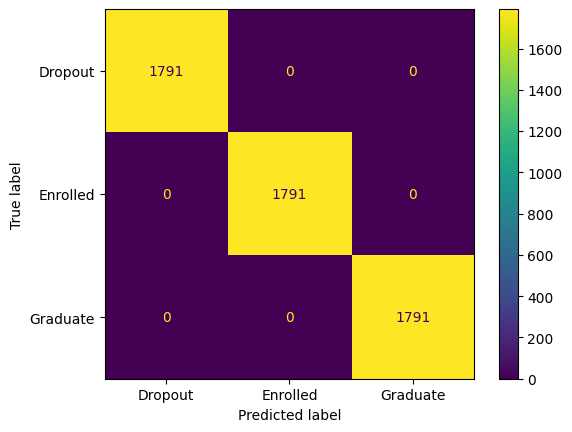

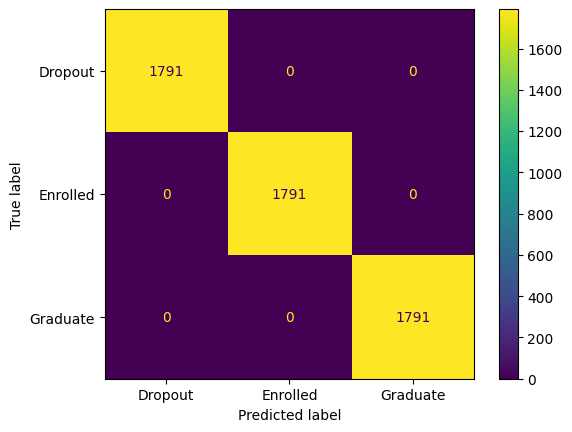

In [34]:
ConfusionMatrixDisplay.from_estimator(Model_1, X_train_resampled, y_train_resampled);


In [35]:
 acc_train = Model_1.score(X_train_resampled, y_train_resampled)
 acc_test = Model_1.score(X_test, y_test)

print("Training Accuracy:", round(acc_train, 4))
print("Test Accuracy:", round(acc_test, 4))

Training Accuracy: 1.0
Test Accuracy: 0.748
Training Accuracy: 1.0
Test Accuracy: 0.748


**Using an ensemble model, Gradient Boosting Classifiers(Model_2), and grid search to optimize the best parameters**



In [ ]:
Gb= GradientBoostingClassifier(random_state= 42)
params = {
    "n_estimators": range(50, 300, 50),
    "max_depth": range(10, 50, 10)
    }

Model_2= GridSearchCV(Gb, param_grid=params, cv=5, n_jobs=-1,verbose=1)
#Fiitig the model
Model_2.fit(X_train_resampled, y_train_resampled)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [ ]:
acc_train_g = Model_2.score(X_train_over, y_train_over)
acc_test_g= Model_2.score(X_test, y_test)

print("Model_2 training Accuracy:", round(acc_train_g, 4))
print("Model_2 test Accuracy:", round(acc_test_g, 4))

**Comparing the two models**



In [ ]:
print("Random forest classifier(Model_1) has the best score of:", Model_1.best_score_)
print("Gradient Boosting classifier(Model_2) has the best score of:", Model_2.best_score_)

In [ ]:
print("Random forest classifier(Model_1) has an accuracy score of:", accuracy_score(y_test, Model_1.predict(X_test)))


print("Gradient Boosting classifier(Model_2) an the accuracy score of:", accuracy_score(y_test, Model_2.predict(X_test)))